In [28]:
from myclasses.sql_executor import SQLExecutor
import pandas as pd

if __name__ == "__main__":
    # Create an instance of SQLExecutor
    sql_executor = SQLExecutor()

    # Example SQL query
    query = """
        SELECT 
            (operating_income / ((total_assets  + total_liabilities) * num_beds)) as roe,
            year,
            ownership,
            ownership_type,
            ((total_debt / (total_assets + total_liabilities) * num_beds)) as debt_to_equity_ratio,
            tot_fund_balance,
            current_ratio,
            quick_ratio,
            medicare,
            medicaid,
            pct_fixed_assets,
            pct_other_assets,
            (tot_days / tot_bed_days_avail) as fill_rate,
            cash,
            chow_last_12mos,
            region,
            state,
            state_lean,
            county_ssa,
            zip,
            tot_discharge_tot,
            def_score,
            fine_tot,
            fine_cnt,
            resfamcouncil,
            sprinkler_status,
            overall_rating,
            quality_rating,
            staffing_rating,
            rn_staffing_rating,
            aidhrd,
            vochrd,
            rnhrd,
            totlichrd,
            tothrd,
            pthrd,
            weighted_all_cycles_score,
            certification,
            snf_avg_stay_len_title_tot,
            pop_over_70,
            over_70_pct,
            has_outpatient,
            bedcert,
            fac_type,
            staff_style,
            totlichrd_to_tot,
            contract_labor
            
            
        FROM Master
        WHERE 
            roa > -1 
            AND roa < 1 
            AND total_assets > 0
            AND total_liabilities > 0 
            AND operating_income < 15000000 
            AND operating_income > -15000000
            AND gross_revenue < 300000000
            AND operating_income < 300000000
            AND (operating_income / ((total_assets  + total_liabilities) * num_beds)) < 1
            AND (operating_income / ((total_assets  + total_liabilities) * num_beds)) > -1
            AND snf_avg_stay_len_title_tot < 100
            
        ORDER BY prov_id; 
        """

    # Execute the query and get the result as a DataFrame
    df = sql_executor.execute_query(query)

# Assuming NA contract_labor means the Nursing home does have contract_labor
df[['contract_labor']] = df[['contract_labor']].fillna(0)

In [29]:
df.describe()

,roe,year,debt_to_equity_ratio,tot_fund_balance,current_ratio,quick_ratio,medicare,medicaid,pct_fixed_assets,pct_other_assets,...,totlichrd,tothrd,pthrd,weighted_all_cycles_score,snf_avg_stay_len_title_tot,pop_over_70,over_70_pct,bedcert,totlichrd_to_tot,contract_labor
count,24110.000000,24110.00000,4.000000,2.409300e+04,24096.000000,23643.000000,24110.000000,24110.000000,23425.000000,18782.000000,...,23446.000000,23446.000000,23446.000000,23845.000000,24110.000000,23657.000000,23657.000000,24078.000000,23446.000000,24110.000000
mean,0.213004,2018.05392,2317.086234,2.485624e+04,25.620589,23.459106,0.998673,0.917669,0.365939,0.162316,...,1.814203,4.248805,0.135124,56.313634,67.241988,116257.649829,0.116867,0.934253,0.425466,1688.040209
std,0.295375,2.01539,857.667670,3.315500e+05,3570.313047,3554.458527,0.036408,0.274874,0.423704,0.357558,...,0.578450,0.964899,0.124222,60.992794,22.036709,191193.833778,0.033019,0.798983,0.072839,4810.731328
min,-0.990569,2015.00000,1663.159586,-1.005025e+07,-7359.016509,-7186.550314,0.000000,0.000000,-0.957468,-14.492250,...,0.000000,1.503410,0.000000,0.000000,0.910000,157.000000,0.030065,0.000010,0.000000,0.000000
25%,0.010712,2016.00000,1904.690580,-7.532678e+03,0.741436,0.004280,1.000000,1.000000,0.072564,0.009802,...,1.472090,3.634898,0.063603,20.667000,51.352500,15655.000000,0.096396,1.000000,0.380605,0.000000
50%,0.128853,2018.00000,2013.034973,8.570508e+03,1.352880,0.091675,1.000000,1.000000,0.257226,0.071752,...,1.701915,4.092780,0.105795,39.000000,70.545000,53029.000000,0.110366,1.000000,0.422075,0.000000
75%,0.379869,2020.00000,2425.430627,3.684450e+04,2.467916,0.577298,1.000000,1.000000,0.617179,0.267815,...,2.018277,4.682957,0.168118,70.000000,85.850000,120983.000000,0.127766,1.000000,0.465018,0.000000
max,0.999913,2022.00000,3579.115405,1.869957e+07,554139.333333,546469.166667,1.000000,1.000000,30.505665,10.689216,...,9.983330,14.745000,2.423130,1099.330000,99.990000,953730.000000,0.446093,120.000000,1.000005,127293.000000


In [30]:
from sklearn.preprocessing import PowerTransformer

y = df['roe']

df = df.drop(columns=['roe'])

# Initialize the scaler
scaler = PowerTransformer()

# Select numerical columns
quant_cols = df.select_dtypes(include=['number']).columns

# Fill NaNs with Mean
quant_cols_mean = df[quant_cols].median()
df[quant_cols] = df[quant_cols].fillna(quant_cols_mean)

# Apply scaling only to the selected numerical columns
df[quant_cols] = scaler.fit_transform(df[quant_cols])

/home/josh/.local/lib/python3.10/site-packages/numpy/core/_methods.py:236: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/home/josh/.local/lib/python3.10/site-packages/numpy/core/_methods.py:247: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


In [31]:
from sklearn.model_selection import train_test_split

# Select columns where data type is text (object)
text_columns = df.select_dtypes(include=['object']).columns

# Create dummy variables for text columns
df_encoded = pd.get_dummies(df, columns=text_columns)

# Convert all columns to numeric type
df_encoded = df_encoded.apply(pd.to_numeric, errors='coerce')

# Extract target variable (y) and independent variables (X)
X = df_encoded

In [32]:
import umap.umap_ as umap

# Assuming X_train is your training data

# # Define UMAP reducer
reducer = umap.UMAP(n_components=8)

# Fit and transform the training data
umap_embeddings = reducer.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

/home/josh/.local/lib/python3.10/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


In [33]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


# Define the architecture of the neural network
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Input layer
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(8, activation='relu'),
    Dense(4, activation='relu'),
    Dense(2, activation='relu'),
    Dense(1, activation='linear')  # Change activation function for regression
])

# Compile the model with mean squared error loss
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])  # Change loss and metrics for regression

# Define early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=30, batch_size=6, validation_data=(X_test, y_test), callbacks=[early_stop])


Epoch 1/30
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.0777 - mae: 0.2098 - val_loss: 0.0720 - val_mae: 0.1927
Epoch 2/30
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.0655 - mae: 0.1911 - val_loss: 0.0653 - val_mae: 0.1871
Epoch 3/30
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.0596 - mae: 0.1786 - val_loss: 0.0638 - val_mae: 0.1819
Epoch 4/30
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.0576 - mae: 0.1750 - val_loss: 0.0619 - val_mae: 0.1852
Epoch 5/30
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.0529 - mae: 0.1677 - val_loss: 0.0610 - val_mae: 0.1780
Epoch 6/30
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.0511 - mae: 0.1641 - val_loss: 0.0660 - val_mae: 0.1891
Epoch 7/30
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.0497 - mae: 0.1622 - val_loss: 0.0592 - val_mae: 0.1763
Epoch 8/30
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.0454 - mae: 0.1531 - val_loss: 0.0596 - val_mae: 0.1743
Epoch 9/30
2411/2411 ━━━━━━━━━━━━━━━━━━━

In [34]:
import numpy as np
from sklearn.metrics import r2_score, median_absolute_error, max_error, mean_absolute_error, mean_squared_error, explained_variance_score

# Apply the model on test data
y_pred = model.predict(X_test)

# R² Score (Coefficient of Determination)
r2 = r2_score(y_test, y_pred)

# Median Absolute Error
mabe = median_absolute_error(y_test, y_pred)

# Max Error
max_error_value = max_error(y_test, y_pred)

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Root Mean Squared Error
rmse = np.sqrt(mse)

# Explained Variance Score
explained_variance = explained_variance_score(y_test, y_pred)


print("Root Mean Squared Error: ${:.2f}".format(rmse))
print("Median Absolute Error: ${:.2f}".format(mabe))
print("Mean Absolute Error: ${:.2f}".format(mae))
print("Max Error: ${:.2f}".format(max_error_value))
print("R² Score (Coefficient of Determination): {:.5f}".format(r2))

302/302 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Root Mean Squared Error: $0.24
Median Absolute Error: $0.12
Mean Absolute Error: $0.18
Max Error: $1.25
R² Score (Coefficient of Determination): 0.33662


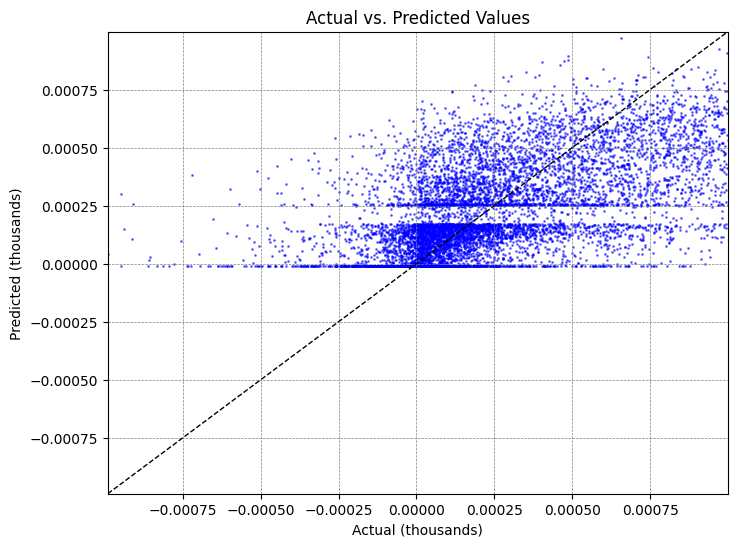

In [35]:
import matplotlib.pyplot as plt

# Convert values to thousands
y_test_thousands = y_test / 1000
y_pred_thousands = y_pred / 1000

plt.figure(figsize=(8, 6))
plt.scatter(y_test_thousands, y_pred_thousands, color='blue', alpha=0.5, s=1)  # Scatter plot of actual vs. predicted values with smaller point size
plt.plot([y_test_thousands.min(), y_test_thousands.max()], [y_test_thousands.min(), y_test_thousands.max()], 'k--', lw=1)  # Plot the diagonal line
plt.xlabel('Actual (thousands)')
plt.ylabel('Predicted (thousands)')
plt.title('Actual vs. Predicted Values')

# Set axis limits to show the actual values
plt.xlim(left=y_test_thousands.min(), right=y_test_thousands.max())
plt.ylim(bottom=y_test_thousands.min(), top=y_test_thousands.max())

# Add light gridlines
plt.grid(color='gray', linestyle='--', linewidth=0.5)

plt.show()